In [2]:
using Fretem, FiniteDifferences, PyPlot

### Part 1: Get collocation points and integration kernel for whole domain

In [3]:
Nh = 64    # The number of Spectral element
Np = 4     # The order of polynomial which used to interpolate and integration

# Define Physical Domain
xratio = 20 # unit: angstrom
xavg = 50   # unit: angstrom

x, w, Ldx, L = getLagrange(Np, xratio/Nh)
e_norm = x[end] - x[1]
interpo_xs = x .+ x[end]

N, xref, w0, Ldx, w = get_fem_xref_weights_basis(Nh, Np, xratio, xavg);

### Test 1: $f(x) = 5x$

In [4]:
# Define function in the assignment form
f(x) = 5 * x

f (generic function with 1 method)

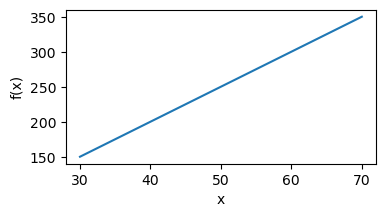

In [8]:
fig, ax = plt.subplots(figsize=(4,2))
ax.plot(xref, f(xref))
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
plt.show()

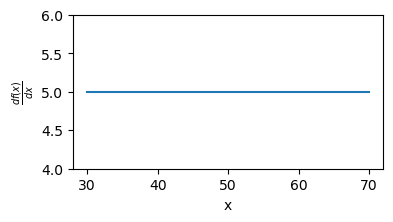

In [15]:
first_deriv = central_fdm(5,1).(f, xref);

fig, ax = plt.subplots(figsize=(4,2))
ax.plot(xref, first_deriv)
ax.set_xlabel("x")
ax.set_ylabel("\$ \\frac{d f(x)}{dx} \$")
ax.set_ylim(4,6)
plt.show()

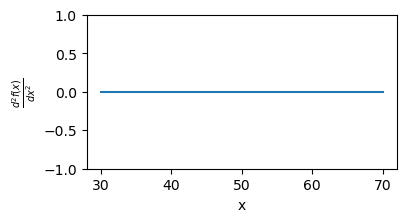

In [17]:
second_deriv = central_fdm(5,2).(f, xref);

fig, ax = plt.subplots(figsize=(4,2))
ax.plot(xref, second_deriv)
ax.set_xlabel("x")
ax.set_ylabel("\$ \\frac{d^2 f(x)}{dx^2} \$")
ax.set_ylim(-1,1)
plt.show()